In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [21]:
# import data
data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/main_dataset.csv')
data = data.iloc[:, 2:]
data.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers


In [22]:
data1 = data.copy()
data1['borough_encode'] = data1['borough']
data1 = data1.replace({'borough_encode': {'Bronx': 0, 'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Staten Island': 4}})
data1.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category,borough_encode
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers,0


In [67]:
data_numeric = data1[['borough_encode', 'population','number_of_restaurants', 'average_review_count', 'average_restaurant_rating', 'average_price_level']]

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [69]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

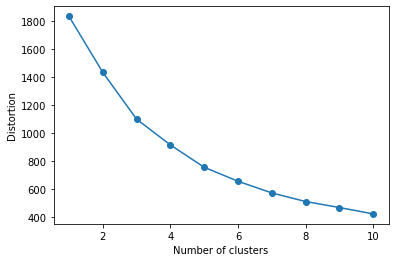

In [70]:
plot_distortion(data_scaled)

In [79]:
km = KMeans(n_clusters=3,
            n_init=10, 
            random_state=0)

In [80]:
y_km = km.fit_predict(data_scaled)

In [81]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

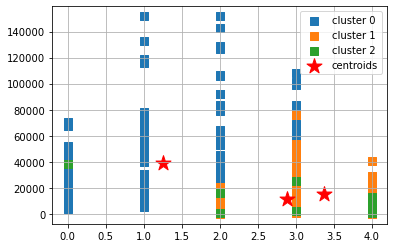

In [82]:
plot_clusters(np.array(data_numeric), y_km, plt_cluster_centers= True)

## Method 2

In [31]:
data.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers


In [33]:
categorical_features_idx = [0, 1,9]
mark_array = data.values

In [34]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
kproto.fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 30, ncost: 13713119625.66567
Run: 1, iteration: 2/20, moves: 22, ncost: 12518300190.589506
Run: 1, iteration: 3/20, moves: 10, ncost: 12204056005.387575
Run: 1, iteration: 4/20, moves: 2, ncost: 12179089914.761066
Run: 1, iteration: 5/20, moves: 0, ncost: 12179089914.761066
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 74, ncost: 21512612794.893528
Run: 2, iteration: 2/20, moves: 43, ncost: 17073157829.199612
Run: 2, iteration: 3/20, moves: 32, ncost: 14334211771.031137
Run: 2, iteration: 4/20, moves: 22, ncost: 13568167078.231462
Run: 2, iteration: 5/20, moves: 11, ncost: 13447347767.474516
Run: 2, iteration: 6/20, moves: 7, ncost: 13389767133.78673
Run: 2, iteration: 7/20, moves

KPrototypes(gamma=7085.339987306333, max_iter=20, n_clusters=5, verbose=2)

In [35]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['-73.91338121151313' '40.716488764828185' '73628.5'
  '21.666666666666668' '464.94444444444446' '4.122222222222224'
  '1.7222222222222223' 'Queens' 'Bay Ridge' 'breakfast_brunch']
 ['-73.98561249280091' '40.667739710086394' '9286.791366906475'
  '13.122302158273381' '382.1294964028777' '3.9525179856115042'
  '1.6474820143884892' 'Staten Island' 'Bay Terrace' 'pizza']
 ['-73.94004214015266' '40.72329105244215' '122245.61538461539' '26.0'
  '418.84615384615387' '4.199999999999997' '1.7692307692307692'
  'Brooklyn' 'Bensonhurst' 'mexican']
 ['-73.91296731439654' '40.72869656786795' '44426.104166666664'
  '20.979166666666668' '454.2083333333333' '4.035416666666667'
  '1.6458333333333333' 'Queens' 'Murray Hill' 'caribbean']
 ['-73.9098841756312' '40.733226898019836' '24824.94318181818'
  '18.636363636363637' '413.45454545454544' '4.096590909090907'
  '1.5340909090909092' 'Brooklyn' 'Bath Beach' 'italian']]


In [38]:
# Prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [40]:
data1['cluster'] = list(clusters)

In [42]:
data1.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category,borough_encode,cluster
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean,0,4
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis,0,3
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean,0,1
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N,0,1
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers,0,1


## Method 3

In [92]:
data.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers


In [94]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data2 = data.copy()
data2[['population','number_of_restaurants', 'average_review_count', 'average_restaurant_rating', 'average_price_level']] = scaler.fit_transform(data2[['population','number_of_restaurants', 'average_review_count', 'average_restaurant_rating', 'average_price_level']])

from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(data2, categorical=[0, 1,9])

labels = pd.DataFrame(clusters)
labeled = pd.concat((data,labels),axis=1)
labeled= labeled.rename({0:'labels'},axis=1)

In [99]:
labeled

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category,labels
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis,1
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers,0
...,...,...,...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,-74.000111,40.756658,23383.0,20,848,4.3,2,newamerican,1
302,Queens,Hammels,-73.805530,40.587338,12295.0,17,257,4.3,2,chicken_wings,0
303,Queens,Bayswater,-73.765968,40.611322,25029.0,0,0,0.0,0,N,0
304,Queens,Queensbridge,-73.945631,40.756091,6677.0,17,222,4.1,2,tradamerican,0


In [112]:
import plotly.express as px
fig = px.scatter(labeled, x="population", y="labels")
fig.show()